In [1]:
import cppyy
import ctypes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cppyy.include(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\SDM274_ML_AI\LinearAutoEncoder\src\LinearAutoEncoder.h")

def get2DCppArray(X):
    if isinstance(X, np.ndarray):
        data_list = X.tolist()
    else:
        data_list = X 
    vector_vector_double = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]
    vector_double = cppyy.gbl.std.vector['double']
    inputs = vector_vector_double()
    for sample in data_list:
        sample_vector = vector_double()
        for feature in sample:
            sample_vector.push_back(feature)
        inputs.push_back(sample_vector)
    return inputs

def get1DCppArray(X):
    if isinstance(X, np.ndarray):
        data_list = X.tolist()
    else:
        data_list = X 
    vector_double = cppyy.gbl.std.vector['double']
    labels_vector = vector_double()
    for label in data_list:
        labels_vector.push_back(label)
    return labels_vector

def get1DPyarray(ctypes_array):
    # 获取Ctypes数组的长度
    length = len(ctypes_array)

    # 将Ctypes数组转换为NumPy数组
    numpy_array = np.fromiter(ctypes_array, dtype=np.float64, count=length)

    return numpy_array

# 其实这里是非线性的（）
class LinearEncoder:
    def __init__(self, epochs, learning_rate, inputSize, hidden):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.inputSize = inputSize
        self.model = cppyy.gbl.PY_LAE()
        hidden = cppyy.gbl.std.vector[int](hidden)
        self.model.selfInit(epochs, learning_rate, inputSize, hidden)
        
    def setLR_VOKE(self, LR_VOKE):
        self.model.setLR_VOKE(LR_VOKE)
        pass;
    
    def train(self, X, y):
        if isinstance(X, np.ndarray):
            data_list = X.tolist()
        else:
            data_list = X 

        if isinstance(y, np.ndarray):
            labels_list = y.tolist()
        else:
            labels_list = y
        
        # declare std::vector in python
        vector_vector_double = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]
        vector_double = cppyy.gbl.std.vector['double']

        # transverse inputs
        inputs = vector_vector_double()
        for sample in data_list:
            sample_vector = vector_double()
            for feature in sample:
                sample_vector.push_back(feature)
            inputs.push_back(sample_vector)

        # transverse labels
        labels_vector = get2DCppArray(labels_list)
        
        self.model.train(inputs, labels_vector)
        pass
    
    def predict(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.predict(X))
    
    def encode(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.encode(X))
        
    
    def decode(self, X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.decode(X))
    
    def binaryDecode(self,X):
        X = get1DCppArray(X)
        return get1DPyarray(self.model.binaryDecode(X))
        

In [12]:
import cv2 as cv
import numpy as np
img = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha2.jpg", 0)
# img = cv.imread(r"D:\resource\mizh\kazuma.jpg", 0)
size = 256
n = size**2
img = cv.resize(img, (size, size))
x = np.reshape(img, (1,n))
x = x.astype(float)
x /= 128
# img = cv.imread(r"D:\resource\mizh\fnn.jpg", 0)
img = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu2.png", 0)
img = cv.resize(img, (size, size))
y = np.reshape(img,(1,n))
y = y.astype(float)
y /= 255
# lea = LinearEncoder(5000,0.01,n,3)
img = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\paimon1.png", 0)
img = cv.resize(img, (size, size))
z = np.reshape(img,(1,n))
z = y.astype(float)
z /= 255
train_data = np.array([y[0],x[0]])
print(train_data)
# show(img)

[[1.        1.        1.        ... 1.        1.        1.       ]
 [1.9453125 1.9609375 1.96875   ... 1.765625  1.7734375 1.765625 ]]


In [13]:
h = [8]
lea = LinearEncoder(3000,0.01,n, h)
lea.setLR_VOKE(200)

In [14]:
lea.train(train_data, train_data)
# print(x[0])
# fnn_encode = lea.encode(y[0])
# fnn_decode = lea.decode(fnn_encode)

# x_predict = lea.predict(x[0])
# show(np.reshape(x_predict, size, size))
# print(x_predict)

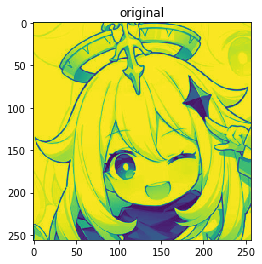

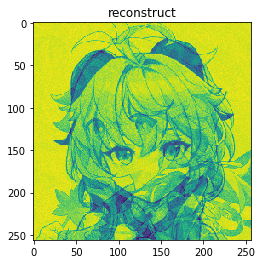

In [5]:
# x_predict = lea.decode(x_encode)
fnn_encode = lea.encode(y[0])
fnn_decode = lea.decode(fnn_encode)
fnn_reconstruct = np.resize(fnn_decode, (size,size))
plt.figure()
plt.imshow(img)
plt.title('original')
plt.show()
plt.figure()
plt.imshow(fnn_reconstruct)
plt.title('reconstruct')
plt.show()

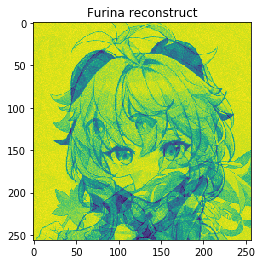

In [6]:
fnn_encode2 = lea.encode(y[0])
fnn_decode2 = lea.decode(fnn_encode2)
fnn_reconstruct2 = np.resize(fnn_decode2, (size,size))
plt.figure()
plt.imshow(fnn_reconstruct2)
plt.title('Furina reconstruct')
plt.show()

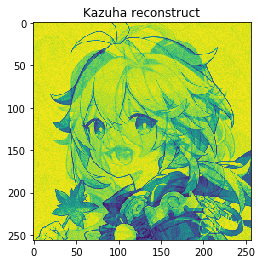

In [7]:
kazuma_encode = lea.encode(x[0])
kazuma_reconstruct = np.resize(lea.decode(kazuma_encode), (size,size))
plt.figure()
plt.imshow(kazuma_reconstruct)
plt.title('Kazuha reconstruct')
plt.show()

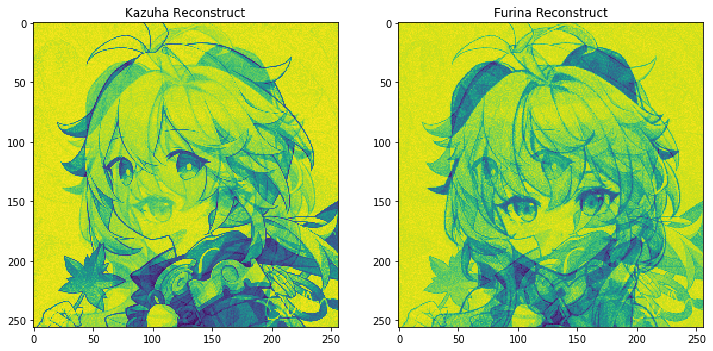

In [8]:
img_kazuha = cv.imread(r"D:\resource\mizh\kazuma.jpg", 0)
img_furina = cv.imread(r"D:\resource\mizh\fnn.jpg", 0)

img_kazuha = cv.resize(img_kazuha, (1024, 1024))
img_furina = cv.resize(img_furina, (1024, 1024))
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(img_kazuha)
# plt.title('Kazuha')


# plt.subplot(1,2,2)
# plt.imshow(img_furina)
# plt.title('Furina')

# 创建一个包含两个子图的画布
plt.figure(figsize=(12, 6))  # 调整画布大小

# 第一个子图：Kazuha
plt.subplot(1, 2, 1)  # 1行2列，第一个子图
plt.imshow(kazuma_reconstruct)  # 显示Kazuha的图像
plt.title('Kazuha Reconstruct')  # 设置子图标题

# 第二个子图：Furina
plt.subplot(1, 2, 2)  # 1行2列，第二个子图
plt.imshow(fnn_reconstruct2)  # 显示Furina的图像
plt.title('Furina Reconstruct')  # 设置子图标题

# 显示图像
plt.show()

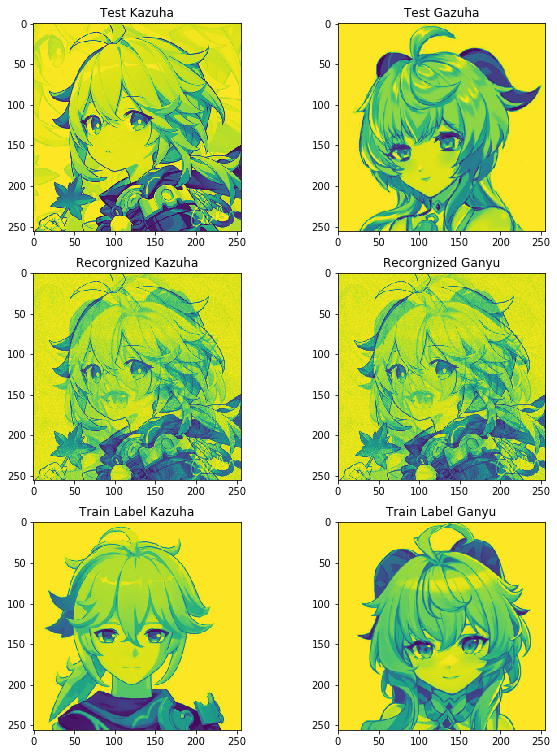

In [9]:
img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha2.jpg", 0)
# img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\test_kazuha2.jpg", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))

plt.figure(figsize=(10, 13))  # 调整画布大小
plt.subplot(3,2,1)
plt.imshow(img_kazuha2)
plt.title('Test Kazuha')

x2 = np.reshape(img_kazuha2, (1,n))
x2 = x2.astype(float)
x2 /= 255

x2_enc = lea.encode(x2[0])
x2_dec = lea.decode(x2_enc)
x2_construct = np.resize(x2_dec,(size,size))

plt.subplot(3,2,3)
plt.imshow(x2_construct)
plt.title('Recorgnized Kazuha')

img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu1.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))


plt.subplot(3,2,2)
plt.imshow(img_kazuha2)
plt.title('Test Gazuha')

x2 = np.reshape(img_kazuha2, (1,n))
x2 = x2.astype(float)
x2 /= 255

x2_enc = lea.encode(x2[0])
x2_dec = lea.decode(x2_enc)
x2_construct = np.resize(x2_dec,(size,size))

plt.subplot(3,2,4)
plt.imshow(x2_construct)
plt.title('Recorgnized Ganyu')

# train_labels
img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\kazuha1.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))
plt.subplot(3,2,5)
plt.imshow(img_kazuha2)
plt.title('Train Label Kazuha')

plt.subplot(3,2,6)
img_kazuha2 = cv.imread(r"D:\Sustech\2023Autumn\ArtificialIntelligent_and_MechineLearning\project\finall_project\src\statics\ganyu2.png", 0)
img_kazuha2 = cv.resize(img_kazuha2, (size, size))
plt.imshow(img_kazuha2)
plt.title('Train Label Ganyu')

plt.show()